In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import scikit-learn

from sklearn.model_selection import train_test_split
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import pickle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
y = df['SalePrice']
df = df.drop(['SalePrice'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# remove columns with less than 30% of data
df = df.dropna(thresh=0.3*len(df), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [6]:
# show unique values in each column with dtype object
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [7]:
def ordinal(df, col, attributes):
    df[col] = df[col].astype('category')
    df[col].cat.set_categories(attributes, ordered=True, inplace=True)

ordinal_mappings={
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "FireplaceQu": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "GarageQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["Po", "Fa", "TA", "Gd", "Ex"],
}

for col, attributes in ordinal_mappings.items():
    ordinal(df, col, attributes)


In [8]:
#show unique values count in each column with dtype int64
for col in df.columns:
    if df[col].dtype == 'int64':
        print(col, len(df[col].unique()))

Id 1460
MSSubClass 15
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [10]:
object_cat_cols_with_na = [col for col in df.columns if df[col].dtype.name in ['object', 'category'] and df[col].isnull().any()]
int_float_cols_with_na = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and df[col].isna().sum() > 0]

# fill missing values with most frequent value
for col in object_cat_cols_with_na:
    df[col].fillna(df[col].mode()[0], inplace=True)

# fill missing values with mean
for col in int_float_cols_with_na:
    df[col].fillna(df[col].mean(), inplace=True)

In [11]:
# encode categorical variables
le = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype.name == 'object' or df[col].dtype.name == 'category':
        df[col] = le.fit_transform(df[col])

# save encoder
with open('encoder.pickle', 'wb') as f:
    pickle.dump(le, f)


In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [14]:
rf=RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [15]:
# mean absolute percentage error
y_pred = rf.predict(x_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error:', round(mape, 2), '%.')

Mean Absolute Percentage Error: 9.61 %.


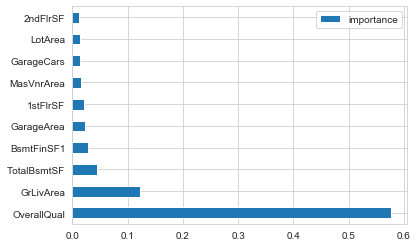

In [16]:
# feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# plot barh
feature_importances.head(10).plot(kind='barh')


In [20]:
most_important_cols=feature_importances.head(5).index
# keep only most important columns
x_train = x_train[most_important_cols]
x_test = x_test[most_important_cols]

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageArea
618,9,1828,1822,48,774
870,5,894,894,0,308
92,5,964,876,713,432
817,8,1689,1568,1218,857
302,7,1541,1541,0,843
...,...,...,...,...,...
763,8,2365,1252,1163,856
835,4,1067,1067,442,436
1216,6,1902,0,0,539
559,7,1557,1374,0,420


In [27]:
def mean_absolute_percentage_error(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return round(mape, 2)

In [28]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# print mean absolute percentage error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(logreg, x_test, y_test), '%.')



C:\Users\bernd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bernd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean Absolute Percentage Error: 27.71 %.


In [32]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# print mean absolute percentage error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(rf, x_test, y_test), '%.')

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# fit the random search model
rf_random.fit(x_train, y_train)


Mean Absolute Percentage Error: 11.62 %.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [33]:
# print best parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [34]:
# create new random forest model with best parameters
rf = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'],
                           max_features=rf_random.best_params_['max_features'],
                           max_depth=rf_random.best_params_['max_depth'],
                           min_samples_split=rf_random.best_params_['min_samples_split'],
                           min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
                           bootstrap=rf_random.best_params_['bootstrap'],
                           random_state=42)

# fit model
rf.fit(x_train, y_train)

# print mean absolute percentage error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(rf, x_test, y_test), '%.')

Mean Absolute Percentage Error: 11.82 %.


In [35]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)

# print mean absolute percentage error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(gb, x_test, y_test), '%.')

Mean Absolute Percentage Error: 11.28 %.


In [37]:
# ensemble rf and gb
from sklearn.ensemble import VotingRegressor
er = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])
er.fit(x_train, y_train)

# print mean absolute percentage error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(er, x_test, y_test), '%.')

Mean Absolute Percentage Error: 11.41 %.


In [38]:
# save model
import pickle
pickle.dump(er, open('model.pkl', 'wb'))

In [41]:
x_train.head()

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageArea
618,9,1828,1822,48,774
870,5,894,894,0,308
92,5,964,876,713,432
817,8,1689,1568,1218,857
302,7,1541,1541,0,843


In [55]:
# import json
import json

json_str="""
{"OverallQual": 7, "GrLivArea": 1710, "TotalBsmtSF": 856, "BsmtFinSF1": 706, "GarageArea": 548}
"""
# read json string as json
json_data = json.loads(json_str)
# convert json to dataframe
data_df = pd.DataFrame(json_data, index=[0])
vals=data_df.values

1710
